<a href="https://colab.research.google.com/github/Codigcar/ComplejidadAlgoritmica/blob/master/week12/12_floyd_warshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import graphviz as gv
import numpy as np

In [ ]:
def floydWarshall(G):
    n = len(G)
    cost = [[math.inf]*n for _ in range(n)]
    path = [[-1]*n for _ in range(n)]

    for u in range(n):
        for v, w in G[u]:
            cost[u][v] = w
            path[u][v] = u

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if i != j and k != j and k != i:
                    f = cost[i][k] + cost[k][j]
                    if f < cost[i][j]:
                        cost[i][j] = f
                        path[i][j] = path[k][j]

    return path, cost

In [ ]:
%%writefile grafito.al
*
0,5 5,6 6,7
0,6 4,4 6,4
1,3
6,5 7,6
3,3
*
*

Writing grafito.al


In [ ]:
G = []
with open("grafito.al") as file:
    for line in file:
        line = line.strip()
        if line == "*":
            G.append([])
        else:
            arcs = line.split(' ')
            arcs = [e.split(',') for e in arcs]
            G.append([(int(u), int(w)) for u, w in arcs])

for r in G:
    print(r)

[]
[(0, 5), (5, 6), (6, 7)]
[(0, 6), (4, 4), (6, 4)]
[(1, 3)]
[(6, 5), (7, 6)]
[(3, 3)]
[]
[]


In [ ]:
def drawAdjList(G):
    n = len(G)
    dot = gv.Digraph(comment="G")

    for u in range(n):
        dot.node(str(u), str(u))
        
    for u in range(n):
        for v, w in G[u]:
            dot.edge(str(u), str(v), label=str(w))
    
    return dot

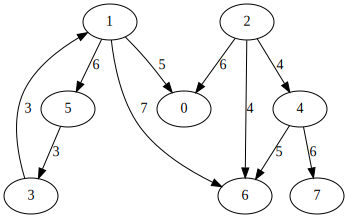

In [ ]:
drawAdjList(G)

In [ ]:
path, cost = floydWarshall(G)
print(np.array(cost))
print(np.array(path))

[[inf inf inf inf inf inf inf inf]
 [ 5. inf inf  9. inf  6.  7. inf]
 [ 6. inf inf inf  4. inf  4. 10.]
 [ 8.  3. inf inf inf  9. 10. inf]
 [inf inf inf inf inf inf  5.  6.]
 [11.  6. inf  3. inf inf 13. inf]
 [inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf]]
[[-1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1  5 -1  1  1 -1]
 [ 2 -1 -1 -1  2 -1  2  4]
 [ 1  3 -1 -1 -1  1  1 -1]
 [-1 -1 -1 -1 -1 -1  4  4]
 [ 1  3 -1  5 -1 -1  1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1]]
